# Plot RXE comparisons

In [1]:
library(ggpubr)
library(tidyverse)

Loading required package: ggplot2

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
save_ggplots <- function(p, fn, w=7, h=7){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(p, filename=paste0(fn, ext), width=w, height=h)
    }
}

In [15]:
df = data.table::fread("../../_m/RXE_public.csv") %>% 
    mutate(Region=gsub("Brain - ", "", SMTSD)) %>%
    mutate_if(is.character, as.factor)
df %>% head(2)

V1,X,autosome,sample,RXE,BioSample Accession,SAMPID,SMTSD,SEX,AGE,RACE,ETHNCTY,Region
<int>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
6,2.188338,2.041579,GTEX-1117F-3226-SM-5N9CT,0.1467595,SAMN02792461,GTEX-1117F-3226-SM-5N9CT,Brain - Cortex,Female,66,2,0,Cortex
17,2.538457,2.331041,GTEX-111FC-3126-SM-5GZZ2,0.2074160,SAMN02790901,GTEX-111FC-3126-SM-5GZZ2,Brain - Cortex,Male,61,3,0,Cortex


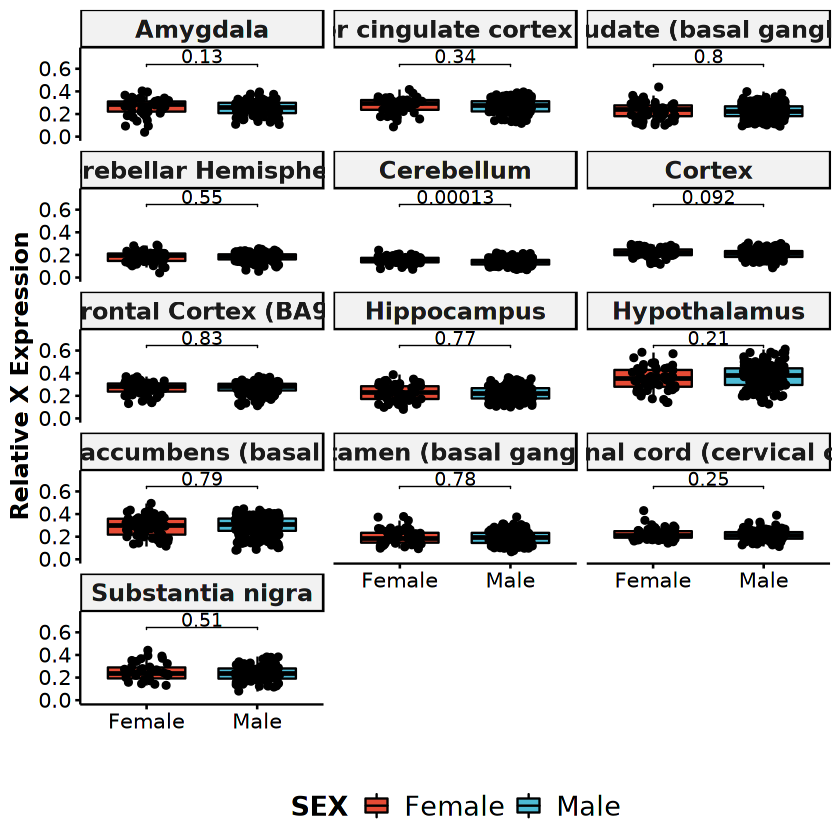

In [17]:
bxp = df %>% 
    ggboxplot(x="SEX", y="RXE", fill='SEX', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by='Region',
              ylab='Relative X Expression', ylim=c(0.05, 0.75),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr(), ncol=3) + 
    stat_compare_means(comparisons=list(c("Female", "Male"))) +
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp, "rxe_sex_byRegion", 12, 16)
bxp

Warning message:
"Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed"
Warning message:
"Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed"
Warning message:
"Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed"
Warning message:
"Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed"


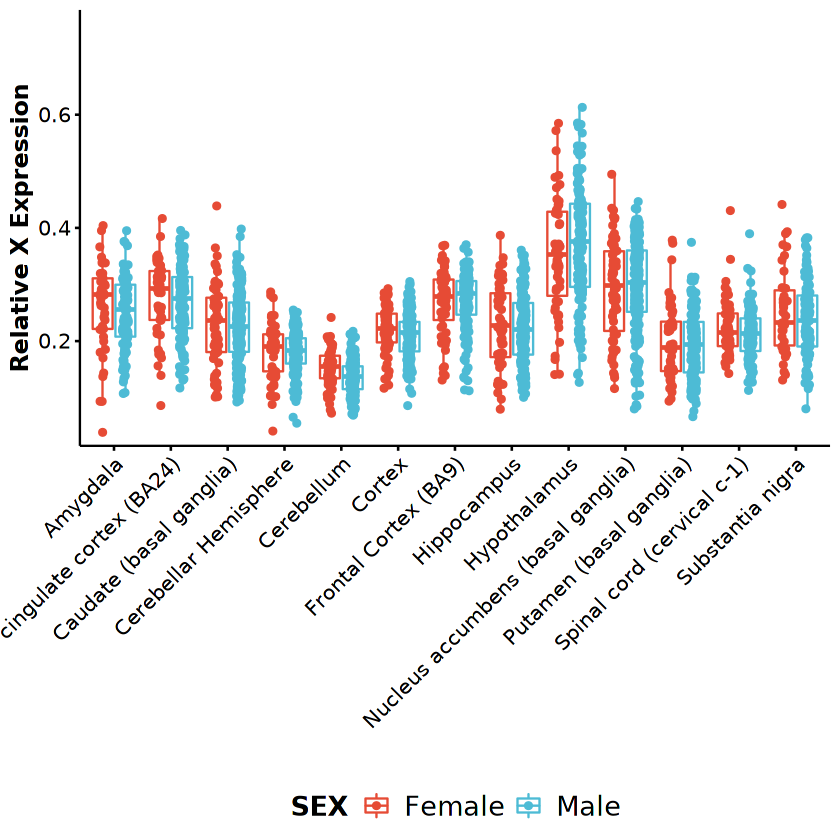

In [20]:
bxp = df %>% 
    ggboxplot(x="Region", y="RXE", color='SEX', xlab='', palette="npg",
              add='jitter', outlier.shape=NA,
              ylab='Relative X Expression', ylim=c(0.05, 0.75),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr(), ncol=3) + 
    stat_compare_means(comparisons=list(c("Female", "Male"))) +
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + rotate_x_text(45) +#rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp, "rxe_sex_region", 10, 6)
bxp